In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [2]:
USERNAME = "postgres"
PASSWORD = "postgres"
DATABASE = "sql-challenge"
rds_connection_string = f"{USERNAME}:{PASSWORD}@localhost:5432/{DATABASE}"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
connection = engine.connect()

In [4]:
engine.table_names()

['employees', 'dept_emp', 'departments', 'dept_manager', 'salaries', 'titles']

In [5]:
employees_df = pd.read_sql_table('employees', engine)  
dept_emp_df = pd.read_sql_table('dept_emp', engine)  
departments_df = pd.read_sql_table('departments', engine)  
dept_manager_df = pd.read_sql_table('dept_manager', engine)  
salaries_df = pd.read_sql_table('salaries', engine)  
titles_df = pd.read_sql_table('titles', engine) 

In [6]:
salaries_df

,emp_no,salary,from_date,to_date
0,10001,"$60,117.00",1986-06-26,1987-06-26
1,10002,"$65,828.00",1996-08-03,1997-08-03
2,10003,"$40,006.00",1995-12-03,1996-12-02
3,10004,"$40,054.00",1986-12-01,1987-12-01
4,10005,"$78,228.00",1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,"$40,000.00",1997-06-02,1998-06-02
300020,499996,"$58,058.00",1996-05-13,1997-05-13
300021,499997,"$49,597.00",1987-08-30,1988-08-29
300022,499998,"$40,000.00",1993-12-27,1994-12-27


In [7]:
dept_emp_df

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,NaT
1,10002,d007,1996-08-03,NaT
2,10003,d004,1995-12-03,NaT
3,10004,d004,1986-12-01,NaT
4,10005,d003,1989-09-12,NaT
...,...,...,...,...
331598,499995,d004,1997-06-02,NaT
331599,499996,d004,1996-05-13,NaT
331600,499997,d005,1987-08-30,NaT
331601,499998,d002,1993-12-27,NaT


In [37]:
result = pd.merge(salaries_df, dept_emp_df, how='right', on=['emp_no', 'emp_no'])
result


,emp_no,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y
0,10001,"$60,117.00",1986-06-26,1987-06-26,d005,1986-06-26,NaT
1,10002,"$65,828.00",1996-08-03,1997-08-03,d007,1996-08-03,NaT
2,10003,"$40,006.00",1995-12-03,1996-12-02,d004,1995-12-03,NaT
3,10004,"$40,054.00",1986-12-01,1987-12-01,d004,1986-12-01,NaT
4,10005,"$78,228.00",1989-09-12,1990-09-12,d003,1989-09-12,NaT
...,...,...,...,...,...,...,...
331598,499995,"$40,000.00",1997-06-02,1998-06-02,d004,1997-06-02,NaT
331599,499996,"$58,058.00",1996-05-13,1997-05-13,d004,1996-05-13,NaT
331600,499997,"$49,597.00",1987-08-30,1988-08-29,d005,1987-08-30,NaT
331601,499998,"$40,000.00",1993-12-27,1994-12-27,d002,1993-12-27,NaT


In [34]:
result2

,emp_no,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,60117,1986-06-26,1987-06-26,d005,1986-06-26,NaT,Development
1,10006,00,1990-08-05,1991-08-05,d005,1990-08-05,NaT,Development
2,10008,46671,1998-03-11,1999-03-11,d005,1998-03-11,2000-07-31,Development
3,10012,00,1992-12-18,1993-12-18,d005,1992-12-18,NaT,Development
4,10014,46168,1993-12-29,1994-12-29,d005,1993-12-29,NaT,Development
...,...,...,...,...,...,...,...,...
331598,499950,54788,1999-02-02,2000-02-02,d002,1999-02-02,2000-02-23,Finance
331599,499975,00,1995-11-21,1996-11-20,d002,1996-10-19,1997-07-23,Finance
331600,499977,70216,1999-12-28,2000-12-27,d002,1999-12-28,NaT,Finance
331601,499989,64183,1996-10-29,1997-10-29,d002,1996-10-29,2001-03-07,Finance


In [49]:

result2=pd.merge(result, departments_df, how='left', on=['dept_no'])
result2

,emp_no,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,"$60,117.00",1986-06-26,1987-06-26,d005,1986-06-26,NaT,Development
1,10002,"$65,828.00",1996-08-03,1997-08-03,d007,1996-08-03,NaT,Sales
2,10003,"$40,006.00",1995-12-03,1996-12-02,d004,1995-12-03,NaT,Production
3,10004,"$40,054.00",1986-12-01,1987-12-01,d004,1986-12-01,NaT,Production
4,10005,"$78,228.00",1989-09-12,1990-09-12,d003,1989-09-12,NaT,Human Resources
...,...,...,...,...,...,...,...,...
331598,499995,"$40,000.00",1997-06-02,1998-06-02,d004,1997-06-02,NaT,Production
331599,499996,"$58,058.00",1996-05-13,1997-05-13,d004,1996-05-13,NaT,Production
331600,499997,"$49,597.00",1987-08-30,1988-08-29,d005,1987-08-30,NaT,Development
331601,499998,"$40,000.00",1993-12-27,1994-12-27,d002,1993-12-27,NaT,Finance


In [50]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [51]:
result2['salary'] = result2['salary'].apply(convert_currency)

In [52]:
result2.head()

,emp_no,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
0,10001,60117.0,1986-06-26,1987-06-26,d005,1986-06-26,NaT,Development
1,10002,65828.0,1996-08-03,1997-08-03,d007,1996-08-03,NaT,Sales
2,10003,40006.0,1995-12-03,1996-12-02,d004,1995-12-03,NaT,Production
3,10004,40054.0,1986-12-01,1987-12-01,d004,1986-12-01,NaT,Production
4,10005,78228.0,1989-09-12,1990-09-12,d003,1989-09-12,NaT,Human Resources


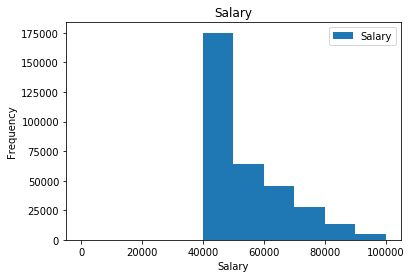

In [62]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
plt.hist(result2['salary'], bins, histtype = 'bar', label = "Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary")
plt.legend (loc = 'best')
plt.savefig('salary-hist.png')
#create labels for each bar. Check back on matplotlib lessons 
#

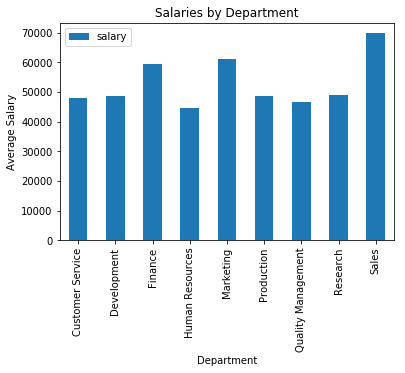

In [60]:
result3 = result2.groupby(['dept_name'])['salary'].mean()
result3.plot.bar()
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Salaries by Department")
plt.legend (loc = 'best')
plt.savefig('avg_sal.png')

In [64]:
whoami = result2[result2['emp_no']==499942]
whoami

,emp_no,salary,from_date_x,to_date_x,dept_no,from_date_y,to_date_y,dept_name
331539,499942,40000.0,1998-03-28,1999-03-28,d005,1998-03-28,NaT,Development
